In [1]:
import wrangle as w 
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
from time import time

import pre_processing_nick as pp
from pre_processing_nick import print_cv_results
import nick_mod as mod

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.ticker import ScalarFormatter
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
df = pp.create_modeling_df()

Using cached CSV
the shape of this modeling df should be (6893, 46)
the current shape is (6893, 46)
please split and then scale this dataframe


In [3]:
X_train, X_validate, X_test,\
y_train, y_validate, y_test = pp.split_and_scale(df)

In [4]:
print('X_train:', X_train.shape)
print('X_validate:', X_validate.shape)
print('X_test:', X_test.shape)

X_train: (3859, 46)
X_validate: (1655, 46)
X_test: (1379, 46)


## Feature Selection
Trying a new approach to feature selection using one of Scikitlearn's transformers. 
This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator.

In [49]:
forest = RandomForestClassifier(n_estimators=8,
                               criterion='entropy')
sfs = SequentialFeatureSelector(forest, n_features_to_select=8)
sfs1 = sfs.fit(X_train, y_train)



In [39]:
sfs.get_support()

array([ True, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False])

In [4]:
# which gives the following best features.
sfs_features = ['budget', 'vote_average', 'vote_count', 'release_year',
                'is_genre_comedy', 'cast_actor_1_Robin Williams',
                'production_company_TwentiethCenturyFoxFilmCorporation',
                'production_company_other_company']    

In [5]:
X_train = X_train.loc[:,sfs_features]
X_validate = X_validate.loc[:,sfs_features]
X_test = X_test.loc[:,sfs_features]


 -----------------------------------------
Logistic Regression Accuracy
Best Score = 0.7673
Best Hyper-parameters = {'C': 10, 'solver': 'lbfgs'}

Test Scores:
0.6110 (+/-0.000) for {'C': 0.001, 'solver': 'newton-cg'}
0.6110 (+/-0.000) for {'C': 0.001, 'solver': 'lbfgs'}
0.6110 (+/-0.000) for {'C': 0.001, 'solver': 'sag'}
0.6110 (+/-0.000) for {'C': 0.001, 'solver': 'saga'}
0.6416 (+/-0.003) for {'C': 0.01, 'solver': 'newton-cg'}
0.6416 (+/-0.003) for {'C': 0.01, 'solver': 'lbfgs'}
0.6416 (+/-0.003) for {'C': 0.01, 'solver': 'sag'}
0.6416 (+/-0.003) for {'C': 0.01, 'solver': 'saga'}
0.6924 (+/-0.004) for {'C': 0.1, 'solver': 'newton-cg'}
0.6924 (+/-0.004) for {'C': 0.1, 'solver': 'lbfgs'}
0.6924 (+/-0.004) for {'C': 0.1, 'solver': 'sag'}
0.6924 (+/-0.004) for {'C': 0.1, 'solver': 'saga'}
0.7409 (+/-0.009) for {'C': 1, 'solver': 'newton-cg'}
0.7409 (+/-0.009) for {'C': 1, 'solver': 'lbfgs'}
0.7409 (+/-0.009) for {'C': 1, 'solver': 'sag'}
0.7409 (+/-0.009) for {'C': 1, 'solver': 'saga'}


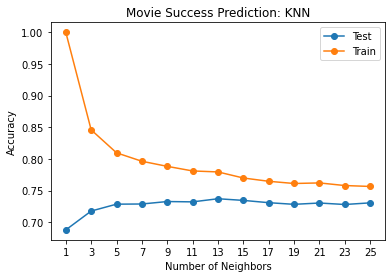

------------------------------------------------

 -----------------------------------------
Decision Tree Regression Accuracy
Best Score = 0.7673
Best Hyper-parameters = {'max_depth': 6}

Test Scores:
0.7162 (+/-0.013) for {'max_depth': 1}
0.7175 (+/-0.014) for {'max_depth': 2}
0.7497 (+/-0.015) for {'max_depth': 3}
0.7551 (+/-0.011) for {'max_depth': 4}
0.7647 (+/-0.017) for {'max_depth': 5}
0.7673 (+/-0.008) for {'max_depth': 6}
0.7668 (+/-0.013) for {'max_depth': 7}
0.7600 (+/-0.016) for {'max_depth': 8}
0.7473 (+/-0.026) for {'max_depth': 9}
0.7463 (+/-0.022) for {'max_depth': 10}
0.7339 (+/-0.021) for {'max_depth': 11}
0.7258 (+/-0.013) for {'max_depth': 12}
0.7207 (+/-0.013) for {'max_depth': 13}
0.7124 (+/-0.013) for {'max_depth': 14}
0.7111 (+/-0.010) for {'max_depth': 15}
0.7077 (+/-0.012) for {'max_depth': 16}

Training Scores:
0.7298 (+/-0.004) for {'max_depth': 1}
0.7309 (+/-0.002) for {'max_depth': 2}
0.7633 (+/-0.004) for {'max_depth': 3}
0.7749 (+/-0.006) for {'max_dept

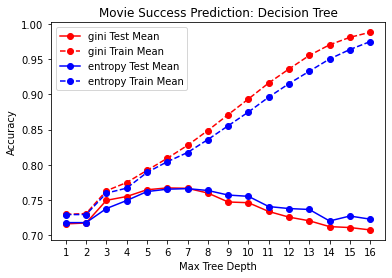

------------------------------------------------

 -----------------------------------------
Random Forest Accuracy
Best Score = 0.7803
Best Hyper-parameters = {'n_estimators': 9}

Test Scores:
0.7440 (+/-0.020) for {'n_estimators': 1}
0.7512 (+/-0.014) for {'n_estimators': 2}
0.7595 (+/-0.014) for {'n_estimators': 3}
0.7652 (+/-0.018) for {'n_estimators': 4}
0.7733 (+/-0.006) for {'n_estimators': 5}
0.7797 (+/-0.017) for {'n_estimators': 6}
0.7792 (+/-0.004) for {'n_estimators': 7}
0.7699 (+/-0.018) for {'n_estimators': 8}
0.7803 (+/-0.015) for {'n_estimators': 9}
0.7800 (+/-0.017) for {'n_estimators': 10}

Training Scores:
0.7832 (+/-0.013) for {'n_estimators': 1}
0.8101 (+/-0.009) for {'n_estimators': 2}
0.8217 (+/-0.005) for {'n_estimators': 3}
0.8294 (+/-0.004) for {'n_estimators': 4}
0.8307 (+/-0.006) for {'n_estimators': 5}
0.8358 (+/-0.007) for {'n_estimators': 6}
0.8369 (+/-0.002) for {'n_estimators': 7}
0.8414 (+/-0.001) for {'n_estimators': 8}
0.8422 (+/-0.005) for {'n_estim

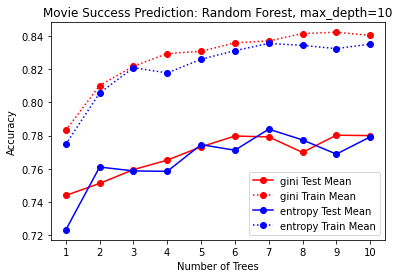

------------------------------------------------
------------------------------------------------


In [6]:
mod.accuracy_models(X_train, y_train)


 -----------------------------------------
Logistic Regression Accuracy
Best Score = 0.7577
Best Hyper-parameters = {'C': 100, 'solver': 'newton-cg'}

Test Scores:
0.6169 (+/-0.001) for {'C': 0.001, 'solver': 'newton-cg'}
0.6169 (+/-0.001) for {'C': 0.001, 'solver': 'lbfgs'}
0.6169 (+/-0.001) for {'C': 0.001, 'solver': 'sag'}
0.6169 (+/-0.001) for {'C': 0.001, 'solver': 'saga'}
0.6169 (+/-0.001) for {'C': 0.01, 'solver': 'newton-cg'}
0.6169 (+/-0.001) for {'C': 0.01, 'solver': 'lbfgs'}
0.6169 (+/-0.001) for {'C': 0.01, 'solver': 'sag'}
0.6169 (+/-0.001) for {'C': 0.01, 'solver': 'saga'}
0.6701 (+/-0.007) for {'C': 0.1, 'solver': 'newton-cg'}
0.6701 (+/-0.007) for {'C': 0.1, 'solver': 'lbfgs'}
0.6701 (+/-0.007) for {'C': 0.1, 'solver': 'sag'}
0.6701 (+/-0.007) for {'C': 0.1, 'solver': 'saga'}
0.7148 (+/-0.009) for {'C': 1, 'solver': 'newton-cg'}
0.7142 (+/-0.010) for {'C': 1, 'solver': 'lbfgs'}
0.7142 (+/-0.010) for {'C': 1, 'solver': 'sag'}
0.7142 (+/-0.010) for {'C': 1, 'solver': 'sa

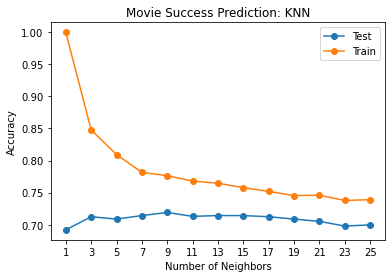

------------------------------------------------

 -----------------------------------------
Decision Tree Regression Accuracy
Best Score = 0.7559
Best Hyper-parameters = {'max_depth': 5}

Test Scores:
0.7251 (+/-0.025) for {'max_depth': 1}
0.7287 (+/-0.020) for {'max_depth': 2}
0.7486 (+/-0.023) for {'max_depth': 3}
0.7517 (+/-0.020) for {'max_depth': 4}
0.7559 (+/-0.026) for {'max_depth': 5}
0.7498 (+/-0.021) for {'max_depth': 6}
0.7408 (+/-0.022) for {'max_depth': 7}
0.7360 (+/-0.029) for {'max_depth': 8}
0.7402 (+/-0.013) for {'max_depth': 9}
0.7257 (+/-0.025) for {'max_depth': 10}
0.7233 (+/-0.024) for {'max_depth': 11}
0.7136 (+/-0.019) for {'max_depth': 12}
0.7106 (+/-0.019) for {'max_depth': 13}
0.7160 (+/-0.017) for {'max_depth': 14}
0.7112 (+/-0.023) for {'max_depth': 15}
0.7100 (+/-0.028) for {'max_depth': 16}

Training Scores:
0.7347 (+/-0.005) for {'max_depth': 1}
0.7350 (+/-0.005) for {'max_depth': 2}
0.7770 (+/-0.004) for {'max_depth': 3}
0.7943 (+/-0.012) for {'max_dept

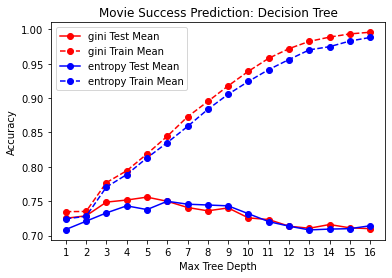

------------------------------------------------

 -----------------------------------------
Random Forest Accuracy
Best Score = 0.7801
Best Hyper-parameters = {'n_estimators': 10}

Test Scores:
0.7378 (+/-0.027) for {'n_estimators': 1}
0.7227 (+/-0.031) for {'n_estimators': 2}
0.7523 (+/-0.030) for {'n_estimators': 3}
0.7680 (+/-0.021) for {'n_estimators': 4}
0.7668 (+/-0.018) for {'n_estimators': 5}
0.7710 (+/-0.030) for {'n_estimators': 6}
0.7680 (+/-0.023) for {'n_estimators': 7}
0.7789 (+/-0.024) for {'n_estimators': 8}
0.7776 (+/-0.017) for {'n_estimators': 9}
0.7801 (+/-0.018) for {'n_estimators': 10}

Training Scores:
0.8092 (+/-0.023) for {'n_estimators': 1}
0.8521 (+/-0.012) for {'n_estimators': 2}
0.8569 (+/-0.012) for {'n_estimators': 3}
0.8672 (+/-0.007) for {'n_estimators': 4}
0.8702 (+/-0.005) for {'n_estimators': 5}
0.8820 (+/-0.007) for {'n_estimators': 6}
0.8844 (+/-0.003) for {'n_estimators': 7}
0.8796 (+/-0.004) for {'n_estimators': 8}
0.8860 (+/-0.009) for {'n_esti

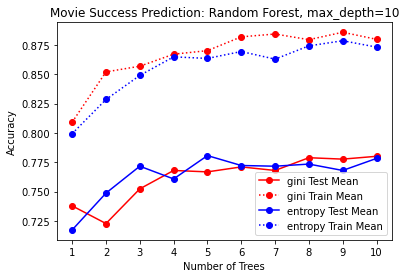

------------------------------------------------
------------------------------------------------


In [9]:
mod.accuracy_models(X_validate, y_validate)


 -----------------------------------------
Logistic Regression Precision
Best Score = 0.7963
Best Hyper-parameters = {'C': 10, 'solver': 'lbfgs'}

Test Scores:
0.7644 (+/-0.027) for {'C': 1, 'solver': 'newton-cg'}
0.7644 (+/-0.027) for {'C': 1, 'solver': 'lbfgs'}
0.7644 (+/-0.027) for {'C': 1, 'solver': 'sag'}
0.7651 (+/-0.028) for {'C': 1, 'solver': 'saga'}
0.7961 (+/-0.025) for {'C': 10, 'solver': 'newton-cg'}
0.7963 (+/-0.025) for {'C': 10, 'solver': 'lbfgs'}
0.7955 (+/-0.024) for {'C': 10, 'solver': 'sag'}
0.7963 (+/-0.025) for {'C': 10, 'solver': 'saga'}
0.7836 (+/-0.021) for {'C': 100, 'solver': 'newton-cg'}
0.7836 (+/-0.021) for {'C': 100, 'solver': 'lbfgs'}
0.7836 (+/-0.021) for {'C': 100, 'solver': 'sag'}
0.7836 (+/-0.021) for {'C': 100, 'solver': 'saga'}
0.7818 (+/-0.019) for {'C': 1000, 'solver': 'newton-cg'}
0.7818 (+/-0.019) for {'C': 1000, 'solver': 'lbfgs'}
0.7820 (+/-0.019) for {'C': 1000, 'solver': 'sag'}
0.7818 (+/-0.019) for {'C': 1000, 'solver': 'saga'}

Training S

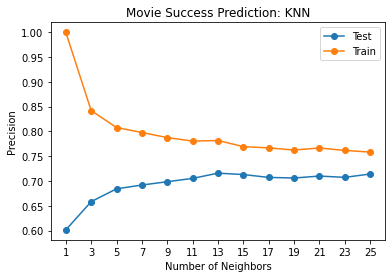

------------------------------------------------

 -----------------------------------------
Decision Tree Regression Precision
Best Score = 0.7552
Best Hyper-parameters = {'max_depth': 3}

Test Scores:
0.7342 (+/-0.066) for {'max_depth': 1}
0.7440 (+/-0.077) for {'max_depth': 2}
0.7552 (+/-0.072) for {'max_depth': 3}
0.7530 (+/-0.039) for {'max_depth': 4}
0.7407 (+/-0.039) for {'max_depth': 5}
0.7351 (+/-0.009) for {'max_depth': 6}
0.7299 (+/-0.022) for {'max_depth': 7}
0.7108 (+/-0.024) for {'max_depth': 8}
0.6938 (+/-0.039) for {'max_depth': 9}
0.6957 (+/-0.033) for {'max_depth': 10}
0.6728 (+/-0.019) for {'max_depth': 11}
0.6560 (+/-0.021) for {'max_depth': 12}
0.6488 (+/-0.007) for {'max_depth': 13}
0.6412 (+/-0.017) for {'max_depth': 14}
0.6332 (+/-0.016) for {'max_depth': 15}
0.6244 (+/-0.014) for {'max_depth': 16}

Training Scores:
0.7571 (+/-0.050) for {'max_depth': 1}
0.7692 (+/-0.061) for {'max_depth': 2}
0.7735 (+/-0.044) for {'max_depth': 3}
0.7880 (+/-0.030) for {'max_dep

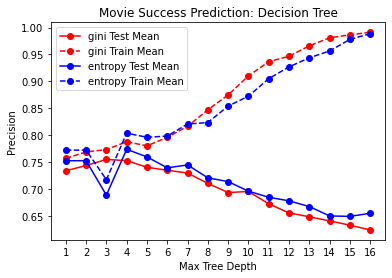

------------------------------------------------
------------------------------------------------


In [7]:
mod.precision_models(X_train, y_train)


 -----------------------------------------
Logistic Regression Precision
Best Score = 0.7862
Best Hyper-parameters = {'C': 10, 'solver': 'newton-cg'}

Test Scores:
0.7299 (+/-0.009) for {'C': 1, 'solver': 'newton-cg'}
0.7277 (+/-0.012) for {'C': 1, 'solver': 'lbfgs'}
0.7277 (+/-0.012) for {'C': 1, 'solver': 'sag'}
0.7277 (+/-0.012) for {'C': 1, 'solver': 'saga'}
0.7862 (+/-0.008) for {'C': 10, 'solver': 'newton-cg'}
0.7862 (+/-0.008) for {'C': 10, 'solver': 'lbfgs'}
0.7862 (+/-0.008) for {'C': 10, 'solver': 'sag'}
0.7856 (+/-0.009) for {'C': 10, 'solver': 'saga'}
0.7839 (+/-0.017) for {'C': 100, 'solver': 'newton-cg'}
0.7839 (+/-0.017) for {'C': 100, 'solver': 'lbfgs'}
0.7839 (+/-0.017) for {'C': 100, 'solver': 'sag'}
0.7797 (+/-0.016) for {'C': 100, 'solver': 'saga'}
0.7792 (+/-0.012) for {'C': 1000, 'solver': 'newton-cg'}
0.7792 (+/-0.012) for {'C': 1000, 'solver': 'lbfgs'}
0.7792 (+/-0.012) for {'C': 1000, 'solver': 'sag'}
0.7792 (+/-0.012) for {'C': 1000, 'solver': 'saga'}

Traini

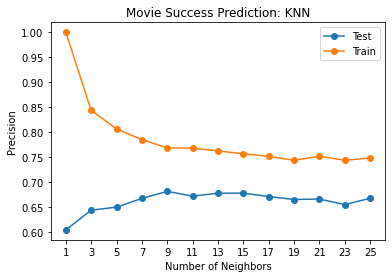

------------------------------------------------

 -----------------------------------------
Decision Tree Regression Precision
Best Score = 0.7210
Best Hyper-parameters = {'max_depth': 4}

Test Scores:
0.6459 (+/-0.038) for {'max_depth': 1}
0.6865 (+/-0.053) for {'max_depth': 2}
0.6889 (+/-0.033) for {'max_depth': 3}
0.7210 (+/-0.063) for {'max_depth': 4}
0.6788 (+/-0.026) for {'max_depth': 5}
0.6946 (+/-0.053) for {'max_depth': 6}
0.6789 (+/-0.040) for {'max_depth': 7}
0.6728 (+/-0.049) for {'max_depth': 8}
0.6703 (+/-0.024) for {'max_depth': 9}
0.6645 (+/-0.037) for {'max_depth': 10}
0.6535 (+/-0.024) for {'max_depth': 11}
0.6487 (+/-0.019) for {'max_depth': 12}
0.6297 (+/-0.016) for {'max_depth': 13}
0.6268 (+/-0.027) for {'max_depth': 14}
0.6269 (+/-0.028) for {'max_depth': 15}
0.6296 (+/-0.014) for {'max_depth': 16}

Training Scores:
0.6587 (+/-0.021) for {'max_depth': 1}
0.7073 (+/-0.079) for {'max_depth': 2}
0.7266 (+/-0.013) for {'max_depth': 3}
0.7778 (+/-0.044) for {'max_dep

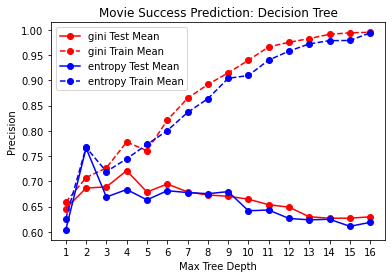

------------------------------------------------
------------------------------------------------


In [10]:
mod.precision_models(X_validate, y_validate)


 -----------------------------------------
Logistic Regression Recall
Best Score = 0.5530
Best Hyper-parameters = {'C': 1000, 'solver': 'sag'}

Test Scores:
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'newton-cg'}
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'lbfgs'}
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'sag'}
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'saga'}
0.1179 (+/-0.002) for {'C': 0.01, 'solver': 'newton-cg'}
0.1179 (+/-0.002) for {'C': 0.01, 'solver': 'lbfgs'}
0.1179 (+/-0.002) for {'C': 0.01, 'solver': 'sag'}
0.1179 (+/-0.002) for {'C': 0.01, 'solver': 'saga'}
0.3997 (+/-0.011) for {'C': 0.1, 'solver': 'newton-cg'}
0.3997 (+/-0.011) for {'C': 0.1, 'solver': 'lbfgs'}
0.3997 (+/-0.011) for {'C': 0.1, 'solver': 'sag'}
0.3997 (+/-0.011) for {'C': 0.1, 'solver': 'saga'}
0.4837 (+/-0.005) for {'C': 1, 'solver': 'newton-cg'}
0.4837 (+/-0.005) for {'C': 1, 'solver': 'lbfgs'}
0.4837 (+/-0.005) for {'C': 1, 'solver': 'sag'}
0.4837 (+/-0.005) for {'C': 1, 'solver': 'saga'}
0.

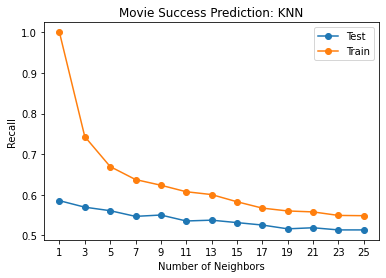


 -----------------------------------------
Decision Tree Regression Recall
Best Score = 0.6529
Best Hyper-parameters = {'max_depth': 8}

Test Scores:
0.4430 (+/-0.072) for {'max_depth': 1}
0.4397 (+/-0.074) for {'max_depth': 2}
0.5483 (+/-0.061) for {'max_depth': 3}
0.5563 (+/-0.021) for {'max_depth': 4}
0.6109 (+/-0.037) for {'max_depth': 5}
0.6289 (+/-0.017) for {'max_depth': 6}
0.6336 (+/-0.023) for {'max_depth': 7}
0.6529 (+/-0.027) for {'max_depth': 8}
0.6375 (+/-0.034) for {'max_depth': 9}
0.6282 (+/-0.032) for {'max_depth': 10}
0.6296 (+/-0.028) for {'max_depth': 11}
0.6182 (+/-0.035) for {'max_depth': 12}
0.6322 (+/-0.045) for {'max_depth': 13}
0.6242 (+/-0.043) for {'max_depth': 14}
0.6282 (+/-0.038) for {'max_depth': 15}
0.6402 (+/-0.045) for {'max_depth': 16}

Training Scores:
0.4629 (+/-0.070) for {'max_depth': 1}
0.4570 (+/-0.075) for {'max_depth': 2}
0.5648 (+/-0.074) for {'max_depth': 3}
0.5798 (+/-0.035) for {'max_depth': 4}
0.6506 (+/-0.031) for {'max_depth': 5}
0.684

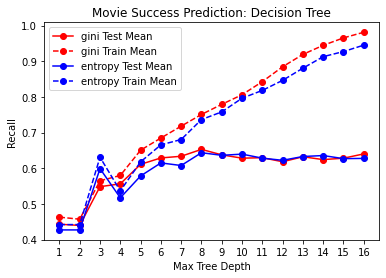


 -----------------------------------------
Random Forest Recall
Best Score = 0.6242
Best Hyper-parameters = {'n_estimators': 9}

Test Scores:
0.5883 (+/-0.043) for {'n_estimators': 1}
0.5823 (+/-0.014) for {'n_estimators': 2}
0.5949 (+/-0.048) for {'n_estimators': 3}
0.6036 (+/-0.025) for {'n_estimators': 4}
0.5956 (+/-0.033) for {'n_estimators': 5}
0.6009 (+/-0.010) for {'n_estimators': 6}
0.6089 (+/-0.011) for {'n_estimators': 7}
0.6056 (+/-0.015) for {'n_estimators': 8}
0.6242 (+/-0.029) for {'n_estimators': 9}
0.6129 (+/-0.023) for {'n_estimators': 10}

Training Scores:
0.6615 (+/-0.060) for {'n_estimators': 1}
0.6804 (+/-0.011) for {'n_estimators': 2}
0.6827 (+/-0.034) for {'n_estimators': 3}
0.6915 (+/-0.014) for {'n_estimators': 4}
0.6925 (+/-0.034) for {'n_estimators': 5}
0.6944 (+/-0.020) for {'n_estimators': 6}
0.6945 (+/-0.025) for {'n_estimators': 7}
0.6840 (+/-0.016) for {'n_estimators': 8}
0.7039 (+/-0.007) for {'n_estimators': 9}
0.6979 (+/-0.009) for {'n_estimators': 1

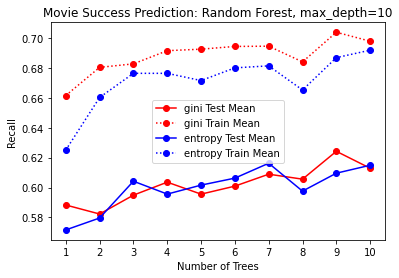

In [8]:
mod.recall_models(X_train, y_train)


 -----------------------------------------
Logistic Regression Recall
Best Score = 0.5110
Best Hyper-parameters = {'C': 1000, 'solver': 'newton-cg'}

Test Scores:
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'newton-cg'}
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'lbfgs'}
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'sag'}
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'saga'}
0.0000 (+/-0.000) for {'C': 0.01, 'solver': 'newton-cg'}
0.0000 (+/-0.000) for {'C': 0.01, 'solver': 'lbfgs'}
0.0000 (+/-0.000) for {'C': 0.01, 'solver': 'sag'}
0.0000 (+/-0.000) for {'C': 0.01, 'solver': 'saga'}
0.2761 (+/-0.043) for {'C': 0.1, 'solver': 'newton-cg'}
0.2761 (+/-0.043) for {'C': 0.1, 'solver': 'lbfgs'}
0.2761 (+/-0.043) for {'C': 0.1, 'solver': 'sag'}
0.2761 (+/-0.043) for {'C': 0.1, 'solver': 'saga'}
0.4054 (+/-0.028) for {'C': 1, 'solver': 'newton-cg'}
0.4054 (+/-0.028) for {'C': 1, 'solver': 'lbfgs'}
0.4054 (+/-0.028) for {'C': 1, 'solver': 'sag'}
0.4054 (+/-0.028) for {'C': 1, 'solver': 'sag

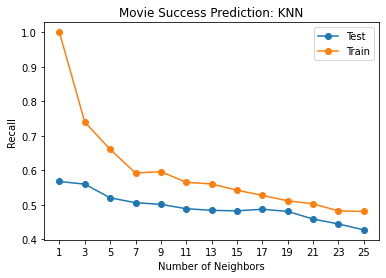


 -----------------------------------------
Decision Tree Regression Recall
Best Score = 0.6845
Best Hyper-parameters = {'max_depth': 5}

Test Scores:
0.6324 (+/-0.030) for {'max_depth': 1}
0.5663 (+/-0.129) for {'max_depth': 2}
0.6277 (+/-0.035) for {'max_depth': 3}
0.5962 (+/-0.049) for {'max_depth': 4}
0.6845 (+/-0.053) for {'max_depth': 5}
0.6309 (+/-0.046) for {'max_depth': 6}
0.6167 (+/-0.048) for {'max_depth': 7}
0.6136 (+/-0.036) for {'max_depth': 8}
0.6230 (+/-0.033) for {'max_depth': 9}
0.6309 (+/-0.043) for {'max_depth': 10}
0.6119 (+/-0.055) for {'max_depth': 11}
0.6104 (+/-0.038) for {'max_depth': 12}
0.6041 (+/-0.047) for {'max_depth': 13}
0.6010 (+/-0.047) for {'max_depth': 14}
0.6072 (+/-0.054) for {'max_depth': 15}
0.6072 (+/-0.048) for {'max_depth': 16}

Training Scores:
0.6455 (+/-0.054) for {'max_depth': 1}
0.5658 (+/-0.108) for {'max_depth': 2}
0.6719 (+/-0.036) for {'max_depth': 3}
0.6581 (+/-0.070) for {'max_depth': 4}
0.7701 (+/-0.027) for {'max_depth': 5}
0.763

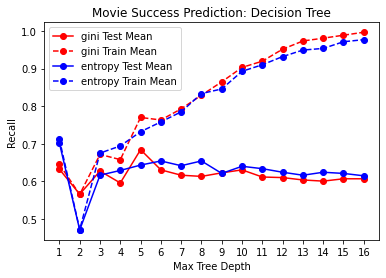


 -----------------------------------------
Random Forest Recall
Best Score = 0.6609
Best Hyper-parameters = {'n_estimators': 9}

Test Scores:
0.6057 (+/-0.050) for {'n_estimators': 1}
0.6120 (+/-0.016) for {'n_estimators': 2}
0.6103 (+/-0.041) for {'n_estimators': 3}
0.6372 (+/-0.046) for {'n_estimators': 4}
0.6404 (+/-0.062) for {'n_estimators': 5}
0.6545 (+/-0.049) for {'n_estimators': 6}
0.6546 (+/-0.050) for {'n_estimators': 7}
0.6483 (+/-0.028) for {'n_estimators': 8}
0.6609 (+/-0.039) for {'n_estimators': 9}
0.6514 (+/-0.034) for {'n_estimators': 10}

Training Scores:
0.7279 (+/-0.033) for {'n_estimators': 1}
0.7417 (+/-0.024) for {'n_estimators': 2}
0.7488 (+/-0.032) for {'n_estimators': 3}
0.7756 (+/-0.019) for {'n_estimators': 4}
0.7878 (+/-0.011) for {'n_estimators': 5}
0.7910 (+/-0.023) for {'n_estimators': 6}
0.7906 (+/-0.015) for {'n_estimators': 7}
0.7815 (+/-0.029) for {'n_estimators': 8}
0.7946 (+/-0.021) for {'n_estimators': 9}
0.7926 (+/-0.016) for {'n_estimators': 1

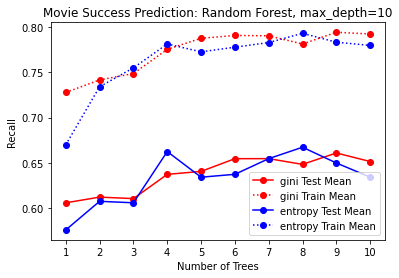

In [11]:
mod.recall_models(X_validate, y_validate)